In [5]:
import numpy                  as np
import matplotlib.pyplot      as plt
from astropy.modeling.models  import BlackBody
from astropy import units     as u

In [6]:
def bb (age_gal, masses):
    
    flux = []

    wav = np.arange(3500,7000) * u.AA
    scale = u.erg/(u.cm**2*u.s*u.AA*u.sr)
    
    for i in range (len(masses)):
        
        T_sun   = 5780 #K
        age_sun = 10 #Gyr
        temperatura = masses[i]**(4/7) * T_sun
        age_star    = masses[i]**(-2)  * age_sun
        luminosity  = masses[i]**(3.5)
        
        if (age_star > age_gal):
            
            bb      = BlackBody(temperature=temperatura*u.K, scale=1*scale)
            nstars  = masses[i]**(-2.35)
            flux.append(bb(wav)*nstars*luminosity/bb.bolometric_flux.value)
            
    return flux


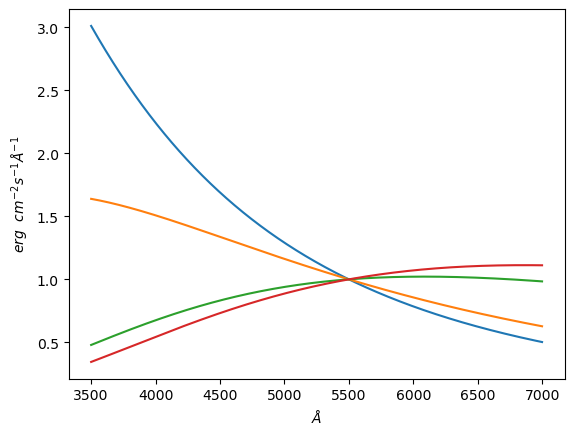

In [7]:
age_gal = [0.1,1,10,15] #Gyr
masses  = np.linspace(0.1,100,10000)
wav     = np.arange(3500,7000) * u.AA

for age in age_gal:
    
    fluxes   = bb(age, masses)
    flux_tot = np.sum(fluxes, axis=0)
    flux_tot = flux_tot/ flux_tot[2000]

    plt.plot(wav, flux_tot)
    plt.xlabel('$\AA$')
    plt.ylabel('$erg$  $cm^{-2}s^{-1}\AA^{-1}$')
    
plt.show()